In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('/content/drive/Shareddrives/Spark! and Sustainable Purchasing/WB Mason Toner and Coffee Purchases_no pricing.xlsx')
df

,Requisition ID,Requisitioning Date,Supplier - ERP Supplier,Description,Requester - Shopper ID,Part - Supplier Part Number,Category
0,PR8853,2020-09-08,WB Mason Company,"952 Ink Cartridges - Cyan, Magenta, Yellow, 3 ...",AMBERFW,HEWN9K27AN,Toner
1,PR32062,2021-01-05,WB Mason Company,"61XL Ink Cartridge, Black (CH563WN)",TWARE,HEWCH563WN,Toner
2,PR12682,2020-09-24,WB Mason Company,"63 Ink Cartridges - Black, Tri-color, 2 Cartri...",SARAHBF,HEWL0R46AN,Toner
3,PR31013,2020-12-21,WB Mason Company,"62 Ink Cartridge, Black (C2P04AN)",JGGOMEZ,HEWC2P04AN,Toner
4,PR28465,2020-12-09,WB Mason Company,"962XL Ink Cartridge, Black (3JA03AN)",TAFELSKI,HEW3JA03AN,Toner
...,...,...,...,...,...,...,...
61425,SH221840,2016-01-20,WB Mason Company,"C-19649044|5727244744|Bulk Coffee, House Blend...",KAEK,PEE501619,Coffee
61426,SH221840,2016-01-20,WB Mason Company,"C-19649044|5727244291|Liquid Coffee Creamer, S...",KAEK,NES35010,Coffee
61427,SH231825,2016-03-01,WB Mason Company,"C-20475400|5730635348|Hot Cups, Paper, 10oz, C...",LOVENDAL,DXE5310DXPK,Coffee
61428,SH221840,2016-01-20,WB Mason Company,"C-19649044|5727246212|Coffee, Regular Ground, ...",KAEK,MWH04648,Coffee


In [ ]:
df.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Requisition ID,Requisitioning Date,Supplier - ERP Supplier,Description,Requester - Shopper ID,Part - Supplier Part Number,Category
count,61430,61430,61430,61430,61430,61430,61430
unique,23858,1153,1,60143,1210,1545,2
top,SH312986,2019-11-07 00:00:00,WB Mason Company,"Original Liquid Coffee Creamer, 0.38 oz. Singl...",ADASILVA,GMT6520,Coffee
freq,44,154,61430,77,1084,2534,45202
first,NaN,2016-01-06 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,2021-02-17 00:00:00,NaN,NaN,NaN,NaN,NaN


In [ ]:
coffee_req, toner_req = df[df.Category=='Coffee'], df[df.Category=='Toner']
coffee_req[:10], toner_req[:10]

(      Requisition ID Requisitioning Date  ... Part - Supplier Part Number Category
 16228        PR11073          2020-09-17  ...                     GMT0845   Coffee
 16229        PR40425          2021-02-09  ...                     GMT9737   Coffee
 16230         PR1339          2020-08-06  ...                     GMT6542   Coffee
 16231        PR22264          2020-11-10  ...                     GMT6663   Coffee
 16232        PR22264          2020-11-10  ...                     GMT6694   Coffee
 16233        PR16970          2020-10-15  ...                     GMT1252   Coffee
 16234         PR9555          2020-09-10  ...                     GMT6080   Coffee
 16235        PR37626          2021-01-28  ...                     GMT6003   Coffee
 16236        PR10565          2020-09-15  ...                     GMT6999   Coffee
 16237        PR17274          2020-10-16  ...                     GMT6792   Coffee
 
 [10 rows x 7 columns],
   Requisition ID Requisitioning Date  ... Part - 

In [ ]:
coffee_req_cat = coffee_req['Description'].str.split(',', expand=True)
coffee_req_cat[0].unique(), coffee_req_cat[1].unique(), coffee_req_cat[2].unique()

(array(['Original Blend K-Cup Pods', 'French Roast K-Cup Pods',
        'C-74465683|5882001041|Brazil Minas Naturais K-Cup Pods', ...,
        'C-20475400|5730635348|Hot Cups', 'C-19649044|5727246212|Coffee',
        'The Keurig Machine in the Research Office appears to be broken'],
       dtype=object),
 array([' 24/BX', ' 22/BX', ' Medium Roast', ' K-Cup Pods', ' 70/BX',
        ' Sumatra', ' Dark Roast', ' 24/Box', ' Light Roast', ' Tea',
        ' Peppermint Bark', " Dukale's Blend", ' Caramel Hideaway',
        ' 196/CT', ' 8 Compartments', ' Assorted Flavors', ' 96/CT',
        ' Raspberry Chocolate Truffle', ' 22/Box', ' Lemon',
        ' Raspberry Chocolate Lava', ' For Coffee Brewer', ' Caramel',
        ' Vanilla Hazelnut Decaf', ' 20/BX', None, ' 96/Carton', ' 2/BX',
        ' Arabica', ' 24/ Box', ' Peach', ' Vanilla Hazelnut',
        ' Raspberry', ' Decaf', ' Decaf Green Tea', ' 9/BX', ' Big Bang',
        ' 4 Compartments', ' Coffee Bean', ' Paper',
        ' 0.38 oz. Si

In [ ]:
toner_req_cat = toner_req['Description'].str.split(',', expand=True)
toner_req_cat[0].unique(), toner_req_cat[1].unique(), toner_req_cat[2].unique()

(array(['952 Ink Cartridges - Cyan', '61XL Ink Cartridge',
        '63 Ink Cartridges - Black', ..., 'C-29404873|5772035762|130A',
        'C-22196188|5738506362|X264H11G High-Yield Toner',
        'C-19635261|5727182732|HP 78A'], dtype=object),
 array([' Magenta', ' Black (CH563WN)', ' Tri-color', ' Black (C2P04AN)',
        ' Black (3JA03AN)', ' Black (CN045AN)', ' Tri-color (CC644WN)',
        ' Black (C2P05AN)', ' Black', ' Black (F6U19AN)', ' Paper',
        ' Black (T6M14AN)', ' Black (3YM56AN)', ' Black (N9K04AN)',
        ' Black (F6U64AN)', ' Tri-color (N9J89AN)', ' Black (N9J90AN)',
        ' 2 Cartridges (3YN96AN)', ' Black (F6U62AN)',
        ' Tri-color (F6U63AN)', ' Tri-color (N9K03AN)', ' Black (CH561WN)',
        ' Black (F6U15AN)', ' 2 Cartridges (3JB40AN)',
        ' Tri-color (CH562WN)',
        ' (C9370A) Photo Black Original Ink Cartridge', ' Black (3YL65AN)',
        None, ' Magenta (CN055AN)', ' Black (CN049AN)', ' Cyan (CN054AN)',
        ' (C9449A) Photo Black 

,req_times
date,
2016,9820
2017,11494
2018,11967
2019,10644
2020,895
2021,382


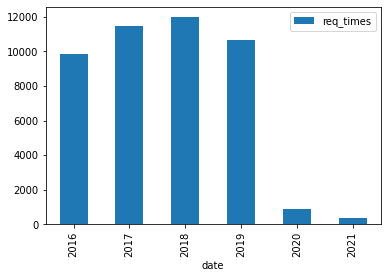

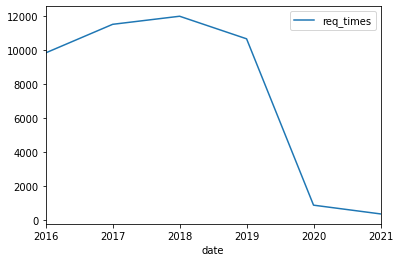

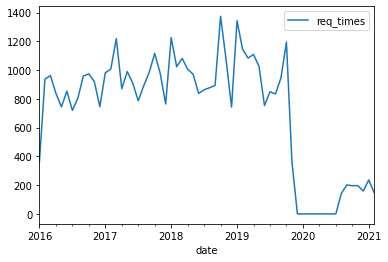

In [ ]:
## Now processing the data from coffee_req
coffee_req_num_by_date = coffee_req.groupby(['Requisitioning Date','Category']).size().reset_index(name='req_times')[['Requisitioning Date','req_times']]
coffee_req_num_by_date.columns = ['date','req_times']
# coffee_req_num_by_date['date'] = pd.to_datetime(coffee_req_num_by_date['date'])
cqd = coffee_req_num_by_date.set_index('date')
# print(cqd.index)
cqm = cqd.resample('MS').sum().to_period('M')
cqy = cqd.resample('YS').sum().to_period('Y')
cqy.plot(kind='bar')
cqy.plot()
cqm.plot()
cqy

,req_times
date,
2016,4255
2017,4183
2018,4051
2019,3208
2020,387
2021,144


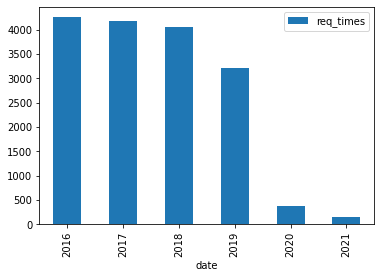

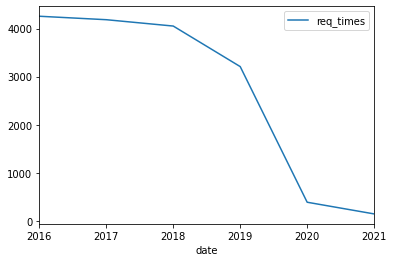

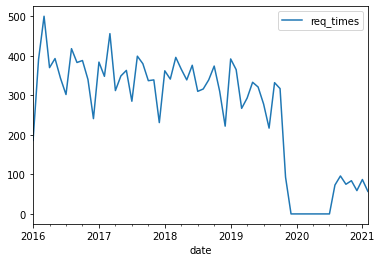

In [ ]:
## Now processing the data from toner_req
toner_req_num_by_date = toner_req.groupby(['Requisitioning Date','Category']).size().reset_index(name='req_times')[['Requisitioning Date','req_times']]
toner_req_num_by_date.columns = ['date','req_times']
# toner_req_num_by_date['date'] = pd.to_datetime(coffee_req_num_by_date['date'])
tqd = toner_req_num_by_date.set_index('date')
# print(cqd.index)
tqm = tqd.resample('MS').sum().to_period('M')
tqy = tqd.resample('YS').sum().to_period('Y')
tqy.plot(kind='bar')
tqy.plot()
tqm.plot()
tqy

NameError: ignored

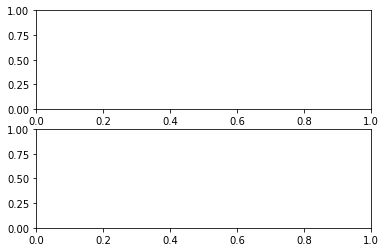

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdate

# Create a canvas
# fig = plt.figure(figsize=(12,9))
# add a sub view
# ax = plt.subplot(111)
# format x-axis
# ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))
# time = cqm['date'].to_list()
# plt.xticks(pd.date_range(time[0],time[-1],freq='D'),rotation=45)

fig, ax = plt.subplots(2,1)

cqm.plot(ax = ax[0], kind='bar')
cqm.plot(ax = ax[1], kind='bar')

ax.set_title('Coffee Product Demands')

ax.set_xlabel('Date',fontsize=20)
ax.set_ylabel('Req#',fontsize=20)

In [ ]:
# remove unnecessary column
coffee = coffee_req[~coffee_req['Part - Supplier Part Number'].str.contains("Unclassified")]
toner = toner_req[~toner_req['Part - Supplier Part Number'].str.contains("Unclassified")]
coffee.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  after removing the cwd from sys.path.


,Requisition ID,Requisitioning Date,Supplier - ERP Supplier,Description,Requester - Shopper ID,Part - Supplier Part Number,Category
count,45193,45193,45193,45193,45193,45193,45193
unique,16285,1129,1,44166,798,573,1
top,SH312986,2017-03-13 00:00:00,WB Mason Company,"Original Liquid Coffee Creamer, 0.38 oz. Singl...",LSKINNER,GMT6520,Coffee
freq,44,131,45193,77,983,2534,45193
first,NaN,2016-01-06 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,2021-02-17 00:00:00,NaN,NaN,NaN,NaN,NaN


In [ ]:
toner.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Requisition ID,Requisitioning Date,Supplier - ERP Supplier,Description,Requester - Shopper ID,Part - Supplier Part Number,Category
count,16221,16221,16221,16221,16221,16221,16221
unique,8916,1088,1,15961,977,971,1
top,SH247710,2017-03-06 00:00:00,WB Mason Company,"58A (CF258A) Toner Cartridge, Black",TWARE,HEWCE505A,Toner
freq,16,50,16221,8,281,347,16221
first,NaN,2016-01-12 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,2021-02-17 00:00:00,NaN,NaN,NaN,NaN,NaN


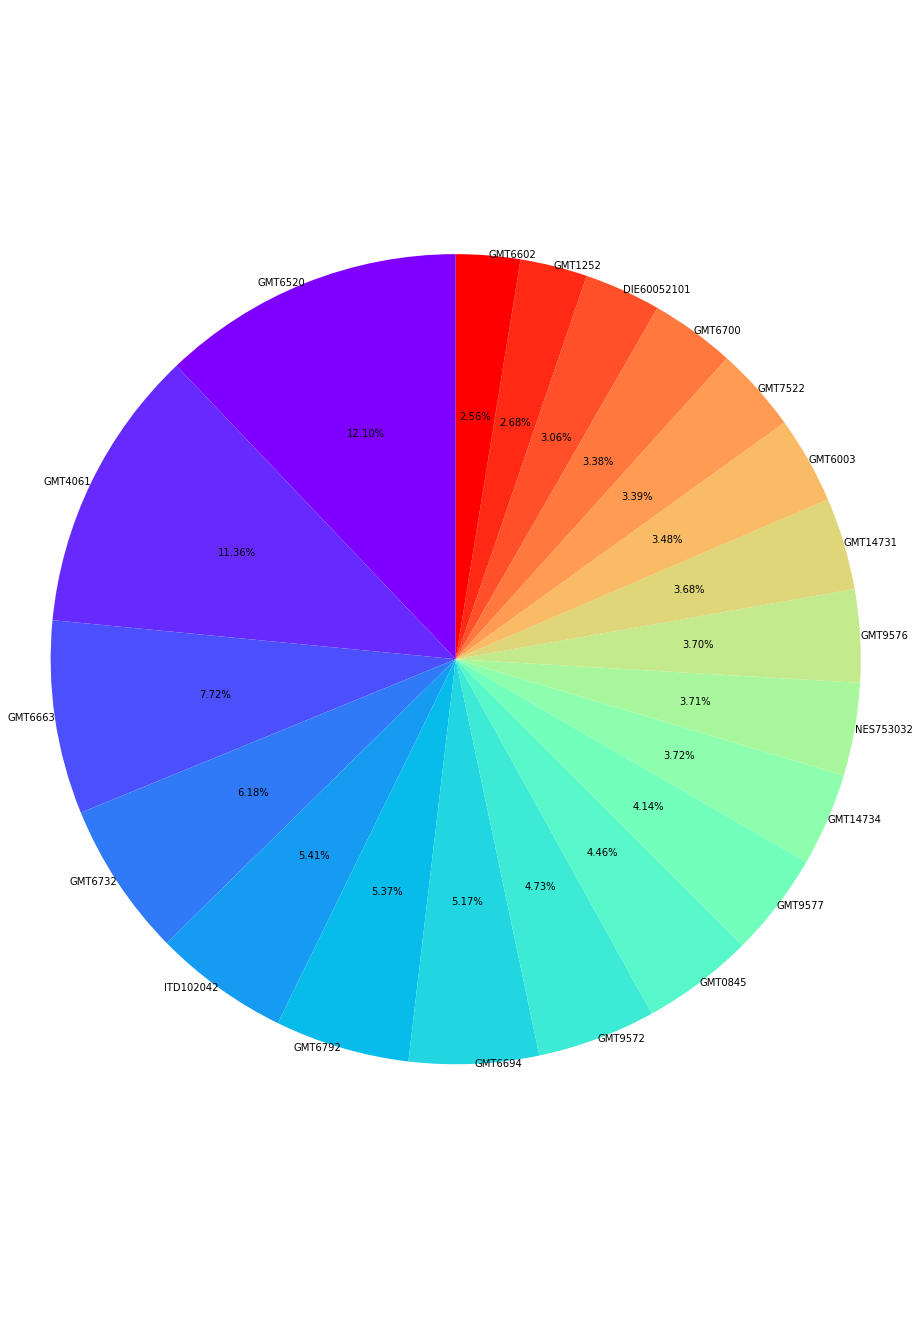

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

items, counts =np.unique(sorted(coffee['Part - Supplier Part Number']), return_counts=True)

temp = pd.DataFrame(data={'items': items,'counts': counts}).sort_values(by=['counts'])

items, counts = temp['items'][-20:][::-1],temp ['counts'][-20:][::-1]

plt.figure(figsize=(16,24))                        #resize the figure
labels = items                                     #define the labels as Supplier Part Number
sizes = counts                                     #define the size corresponds to its count
colors = cm.rainbow(np.linspace(0, 1, len(labels)))#define the color for each sector
explode = (0,)*len(sizes)                          #make distance between sectors

patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
                      colors=colors,
                      labeldistance = 1,           
                      autopct = '%3.2f%%',         
                      shadow = False,              #no shadow
                      startangle =90,              #counter-clockwise
                      pctdistance = 0.6)           #value distance from the center of the pie


plt.axis('equal')
# plt.legend()
plt.show()

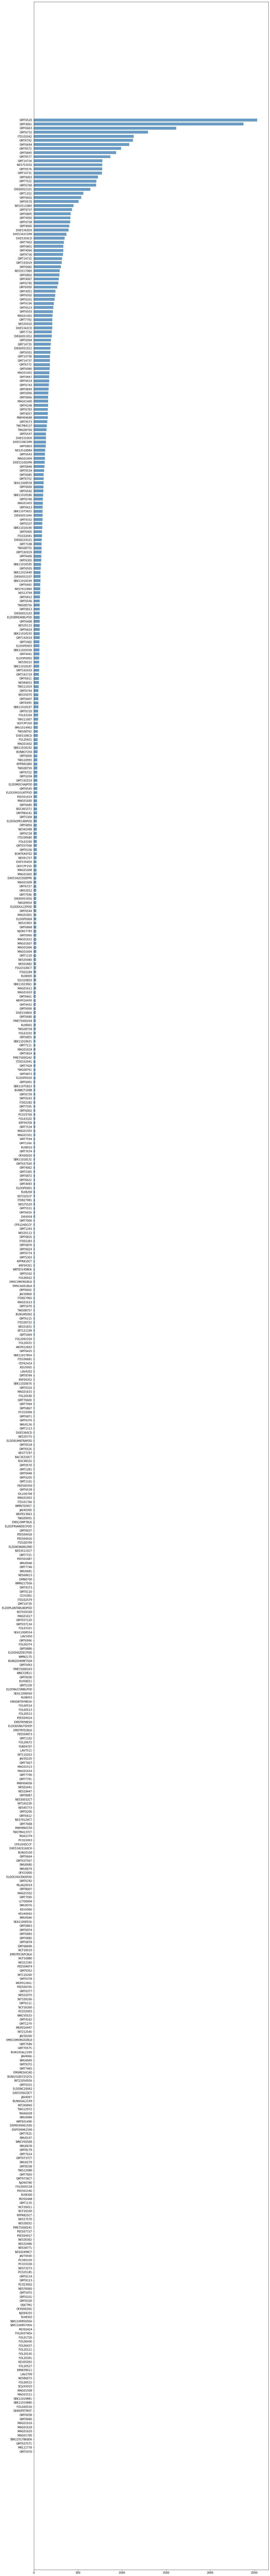

In [ ]:
items, counts =np.unique(sorted(coffee['Part - Supplier Part Number']), return_counts=True)

temp = pd.DataFrame(data={'items': items,'counts': counts}).sort_values(by=['counts'])

items, counts = temp['items'],temp ['counts']

plt.figure(figsize=(16,180)) 
plt.barh(range(len(counts)), counts, height=0.7, color='steelblue', alpha=0.8)
plt.yticks(range(len(counts)), items)
plt.show()

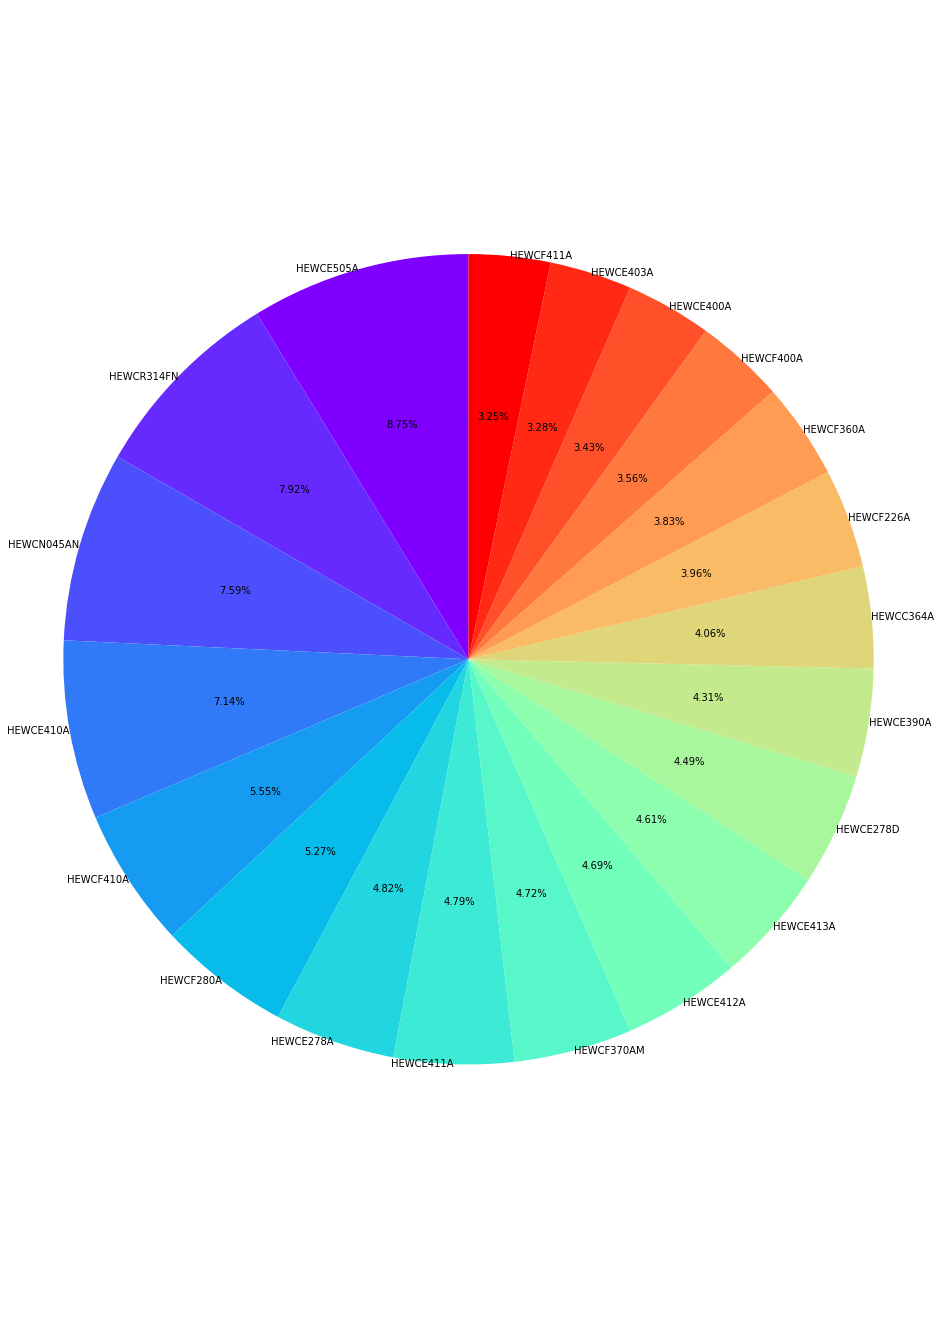

In [ ]:
items, counts =np.unique(sorted(toner['Part - Supplier Part Number']), return_counts=True)

temp = pd.DataFrame(data={'items': items,'counts': counts}).sort_values(by=['counts'])

items, counts = temp['items'][-20:][::-1],temp ['counts'][-20:][::-1]

plt.figure(figsize=(16,24))                        #resize the figure
labels = items                                     #define the labels as Supplier Part Number
sizes = counts                                     #define the size corresponds to its count
colors = cm.rainbow(np.linspace(0, 1, len(labels)))#define the color for each sector
explode = (0,)*len(sizes)                          #make distance between sectors

patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
                      colors=colors,
                      labeldistance = 1,           
                      autopct = '%3.2f%%',         
                      shadow = False,              #no shadow
                      startangle =90,              #counter-clockwise
                      pctdistance = 0.6)           #value distance from the center of the pie


plt.axis('equal')
# plt.legend()
plt.show()

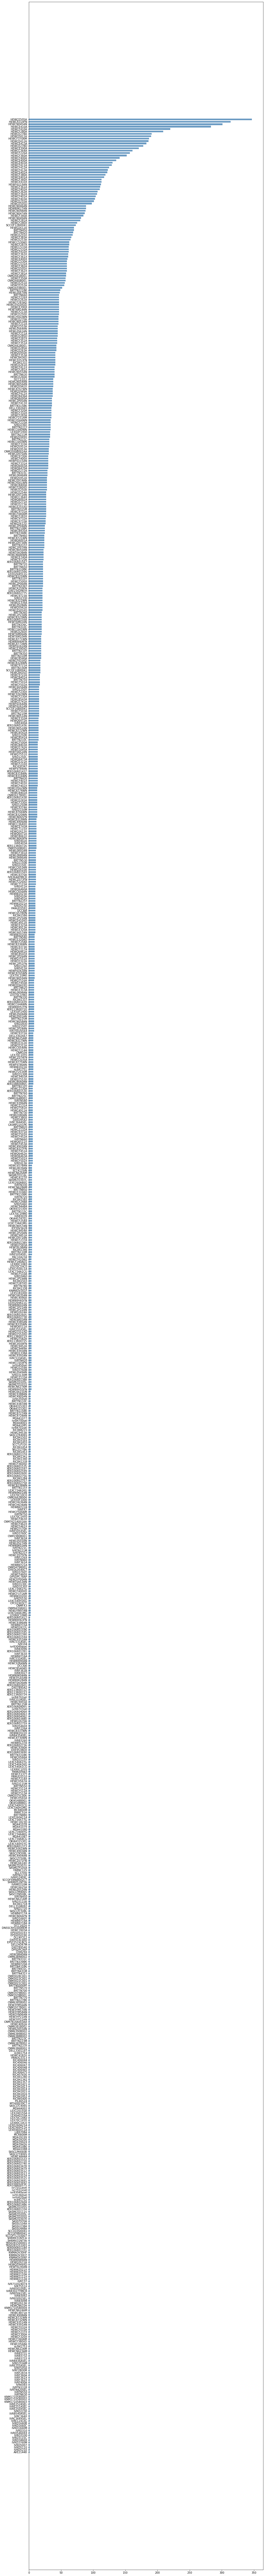

In [ ]:
items, counts =np.unique(sorted(toner['Part - Supplier Part Number']), return_counts=True)

temp = pd.DataFrame(data={'items': items,'counts': counts}).sort_values(by=['counts'])

items, counts = temp['items'],temp ['counts']

plt.figure(figsize=(16,160)) 
plt.barh(range(len(counts)), counts, height=0.7, color='steelblue', alpha=0.8)
plt.yticks(range(len(counts)), items)
plt.show()